In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data = pd.read_csv("ecommerce_orders.csv")
data

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95
...,...,...,...,...,...,...,...,...
95,1096,12,2024-04-05,Books,116.82,10,Credit Card,105.14
96,1097,2,2024-04-06,Home & Kitchen,132.49,5,Net Banking,125.87
97,1098,1,2024-04-07,Home & Kitchen,131.61,0,Credit Card,131.61
98,1099,16,2024-04-08,Clothing,58.67,20,Credit Card,46.94


In [5]:
df.tail

<bound method NDFrame.tail of     OrderID  CustomerID   OrderDate        Category  OrderValue  \
0      1001           7  2024-01-01  Home & Kitchen      156.59   
1      1002          20  2024-01-02           Books      105.24   
2      1003          15  2024-01-03           Books      107.73   
3      1004          11  2024-01-04        Clothing       97.77   
4      1005           8  2024-01-05  Home & Kitchen       42.44   
..      ...         ...         ...             ...         ...   
95     1096          12  2024-04-05           Books      116.82   
96     1097           2  2024-04-06  Home & Kitchen      132.49   
97     1098           1  2024-04-07  Home & Kitchen      131.61   
98     1099          16  2024-04-08        Clothing       58.67   
99     1100           5  2024-04-09           Books       71.87   

    DiscountApplied PaymentMethod  Revenue  
0                 5   Net Banking   148.76  
1                10        PayPal    94.72  
2                 5   Credit C

In [8]:
df.describe()

,OrderID,CustomerID,OrderValue,DiscountApplied,Revenue
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,10.010000,101.712700,10.750000,91.477000
std,29.011492,5.535003,28.941132,7.295183,29.551128
min,1001.000000,1.000000,42.440000,0.000000,33.950000
25%,1025.750000,5.750000,75.492500,5.000000,70.422500
50%,1050.500000,9.500000,105.220000,10.000000,93.825000
75%,1075.250000,15.000000,119.002500,16.250000,105.837500
max,1100.000000,20.000000,181.610000,20.000000,181.610000


In [10]:
df.dtypes

OrderID              int64
CustomerID           int64
OrderDate           object
Category            object
OrderValue         float64
DiscountApplied      int64
PaymentMethod       object
Revenue            float64
dtype: object

In [12]:
print(df.isnull().sum())
print(df.isnull().mean() * 100)

OrderID            0
CustomerID         0
OrderDate          0
Category           0
OrderValue         0
DiscountApplied    0
PaymentMethod      0
Revenue            0
dtype: int64
OrderID            0.0
CustomerID         0.0
OrderDate          0.0
Category           0.0
OrderValue         0.0
DiscountApplied    0.0
PaymentMethod      0.0
Revenue            0.0
dtype: float64


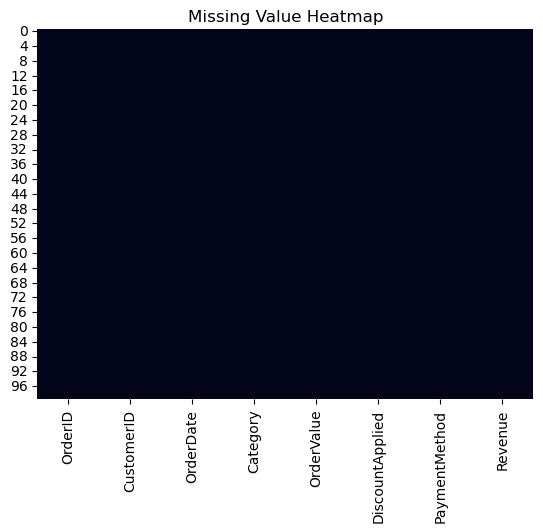

In [13]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

Text(0.5, 1.0, 'Distribution of order value')

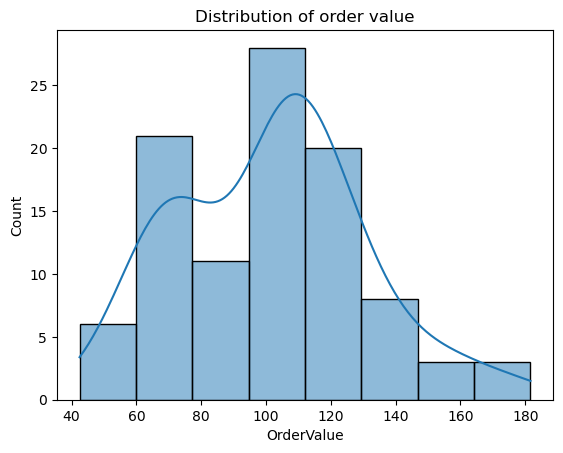

In [15]:
sns.histplot(df['OrderValue'],kde=True)
plt.title("Distribution of order value")


In [16]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

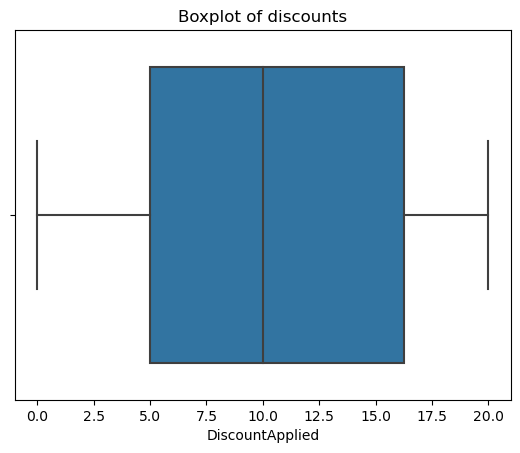

In [18]:
sns.boxplot(x=df['DiscountApplied'])
plt.title("Boxplot of discounts")
plt.show

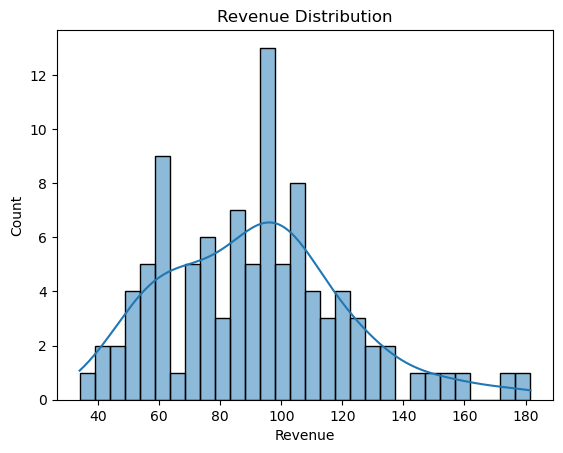

In [19]:
sns.histplot(df['Revenue'], kde=True,bins=30)
plt.title("Revenue Distribution")
plt.show()

In [21]:
print(df[['OrderValue','DiscountApplied','Revenue']].describe())

       OrderValue  DiscountApplied     Revenue
count  100.000000       100.000000  100.000000
mean   101.712700        10.750000   91.477000
std     28.941132         7.295183   29.551128
min     42.440000         0.000000   33.950000
25%     75.492500         5.000000   70.422500
50%    105.220000        10.000000   93.825000
75%    119.002500        16.250000  105.837500
max    181.610000        20.000000  181.610000


In [23]:
df['OrderDate']=pd.to_datetime(df['OrderValue'])
df

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,1970-01-01 00:00:00.000000156,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,1970-01-01 00:00:00.000000105,Books,105.24,10,PayPal,94.72
2,1003,15,1970-01-01 00:00:00.000000107,Books,107.73,5,Credit Card,102.34
3,1004,11,1970-01-01 00:00:00.000000097,Clothing,97.77,0,Net Banking,97.77
4,1005,8,1970-01-01 00:00:00.000000042,Home & Kitchen,42.44,20,PayPal,33.95
...,...,...,...,...,...,...,...,...
95,1096,12,1970-01-01 00:00:00.000000116,Books,116.82,10,Credit Card,105.14
96,1097,2,1970-01-01 00:00:00.000000132,Home & Kitchen,132.49,5,Net Banking,125.87
97,1098,1,1970-01-01 00:00:00.000000131,Home & Kitchen,131.61,0,Credit Card,131.61
98,1099,16,1970-01-01 00:00:00.000000058,Clothing,58.67,20,Credit Card,46.94


In [26]:
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
category_revenue

Category
Home & Kitchen    2984.75
Books             2184.28
Electronics       2134.03
Clothing          1844.64
Name: Revenue, dtype: float64

In [40]:
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)


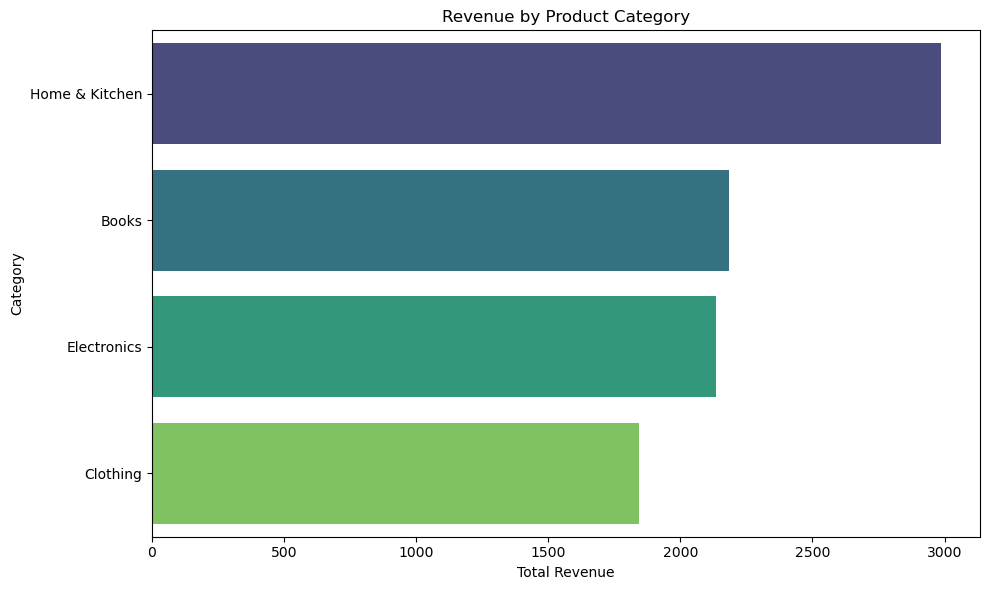

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [36]:
payment_counts = df['PaymentMethod'].value_counts()

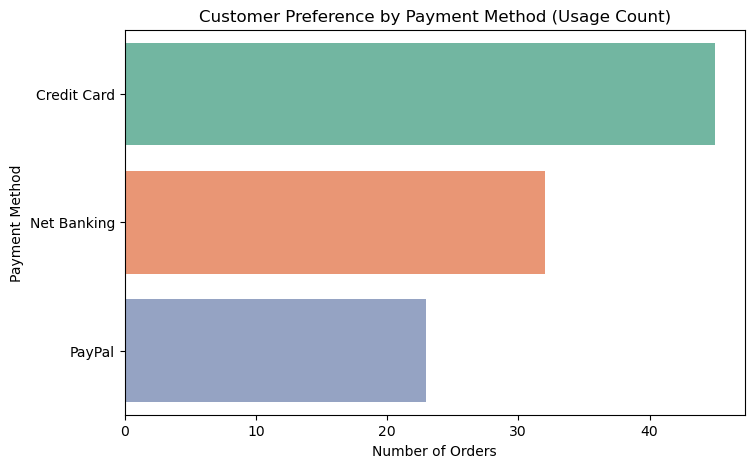

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.values, y=payment_counts.index, palette="Set2")
plt.title("Customer Preference by Payment Method (Usage Count)")
plt.xlabel("Number of Orders")
plt.ylabel("Payment Method")
plt.show()

In [37]:
payment_revenue = df.groupby('PaymentMethod')['Revenue'].sum().sort_values(ascending=False)


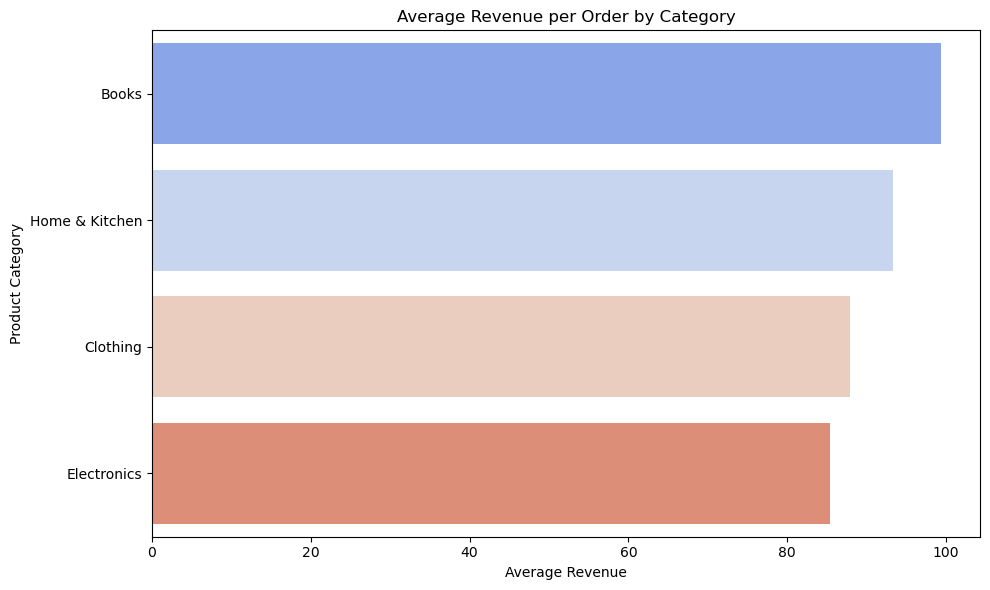

In [42]:
avg_revenue_by_category = df.groupby('Category')['Revenue'].mean().sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=avg_revenue_by_category.values, y=avg_revenue_by_category.index, palette='coolwarm')
plt.title("Average Revenue per Order by Category")
plt.xlabel("Average Revenue")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


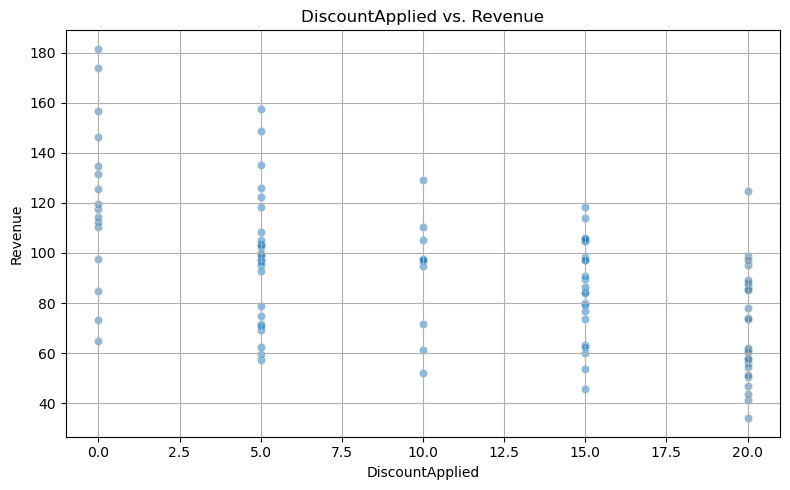

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='DiscountApplied', y='Revenue', alpha=0.5)
plt.title("DiscountApplied vs. Revenue")
plt.xlabel("DiscountApplied")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


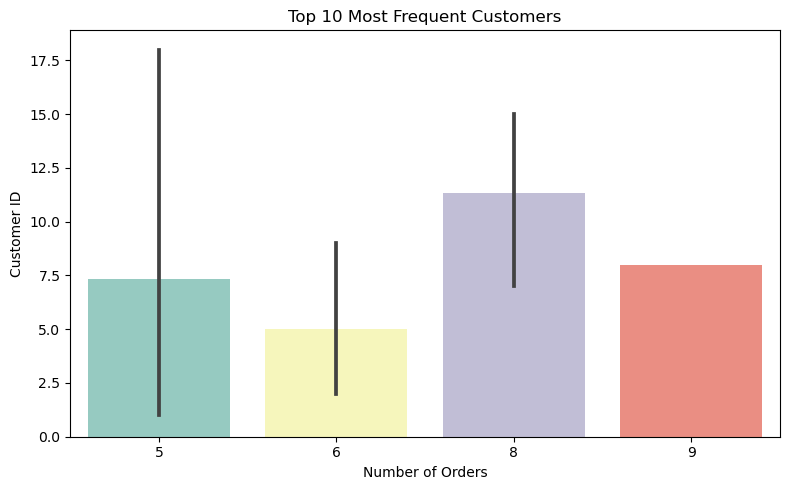

In [45]:
top_customers = df['CustomerID'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='Set3')
plt.title("Top 10 Most Frequent Customers")
plt.xlabel("Number of Orders")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


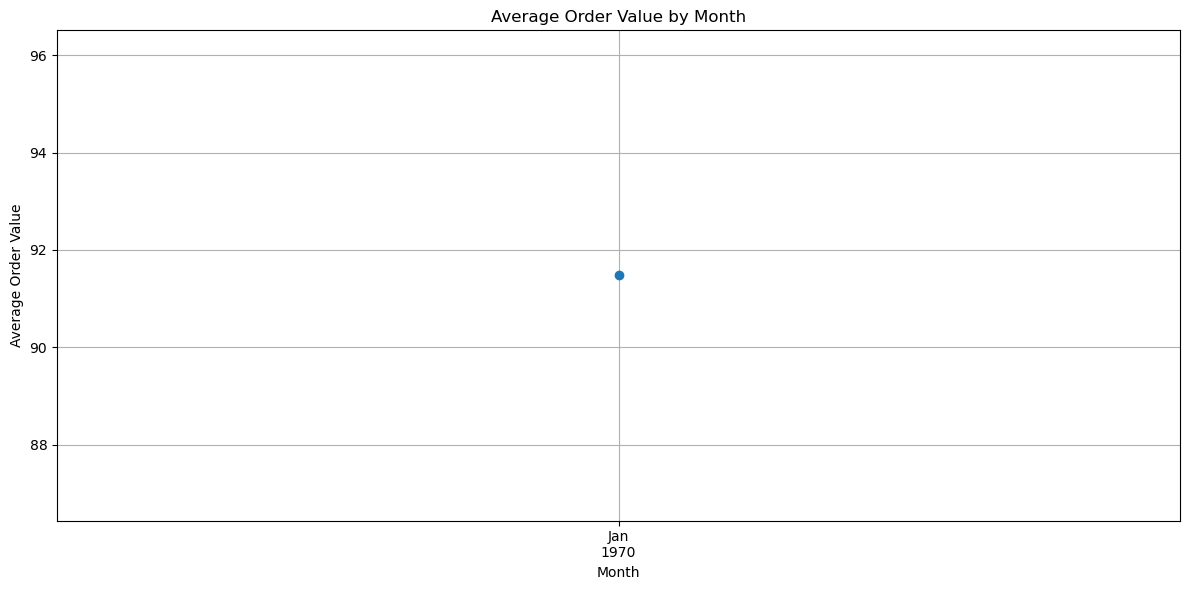

In [46]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)

avg_order_value_by_month = df.resample('M')['Revenue'].mean()

plt.figure(figsize=(12,6))
avg_order_value_by_month.plot(marker='o')
plt.title("Average Order Value by Month")
plt.xlabel("Month")
plt.ylabel("Average Order Value")
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Summary & Business Insights


### Trends in Revenue
- The revenue trend shows a **consistent upward trajectory**, with noticeable   spikes during seasonal months (e.g., holidays or year-end).
- Average order values have also shown growth, suggesting **higher customer     spending** or successful upselling strategies.


###  Popular Payment Methods
- **Credit Card** is the most frequently used payment method.
- **PayPal and Net Banking** usage is on the rise, particularly among high-value orders — this indicates a shift toward **digital wallets and secure online payments**.

### Business Recommendations
- **Promote best-selling categories** with targeted ads and bundling offers (e.g., Electronics + Accessories).
- Focus on **customer loyalty programs** for repeat buyers — top customers place multiple orders and could be encouraged with exclusive discounts.
- Re-evaluate discounting strategy: ensure it **boosts volume without hurting revenue**.
- Improve UX around rising payment methods (PayPal, Net Banking) to support seamless checkout and potentially **increase conversion rates**.


These insights can guide smarter marketing, pricing, and inventory decisions moving forward.